In [30]:
from op_op.load import load_raw_calcium, load_events
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
DATA_DIR = Path(os.environ.get("DATA_DIR")) / "raw"

sns.set_context("notebook", font_scale=1.5)

In [25]:
MOUSE = "example-mouse"
SESSIONS = (
    "rm-early",
    "rm-late",
    "rdt-d1",
    "rdt-d2",
    "rdt-d3",
)
SESSION = "rdt-d1"

In [26]:
df = load_raw_calcium(DATA_DIR, MOUSE, SESSION)
dfp = df.set_index("time")

/tmp/ipykernel_5900/586238524.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)


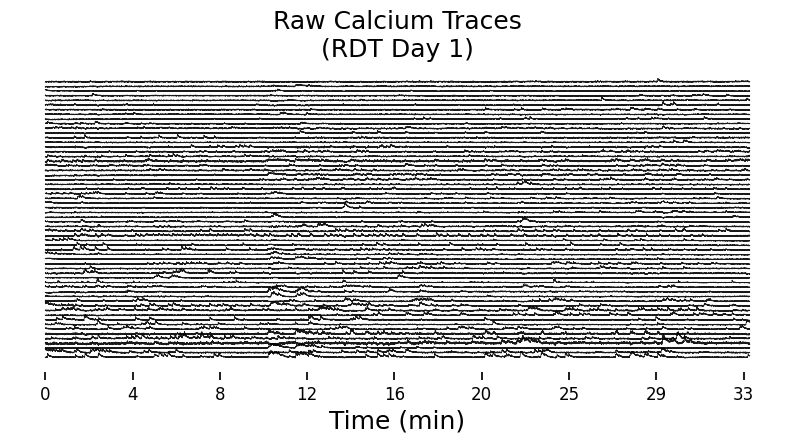

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

offset = 4

for i, neuron in enumerate(dfp.columns):
    ax.plot(dfp.index, dfp[neuron] + (offset * i), alpha=0.9, color="black", lw=0.5)

# divide x tick labels by 60
ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)

ax.set_xlabel("Time (min)")
ax.yaxis.set_visible(False)
ax.set_title("Raw Calcium Traces\n(RDT Day 1)")

sns.despine(fig=fig, left=True, bottom=True)

/tmp/ipykernel_5900/1102222823.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)


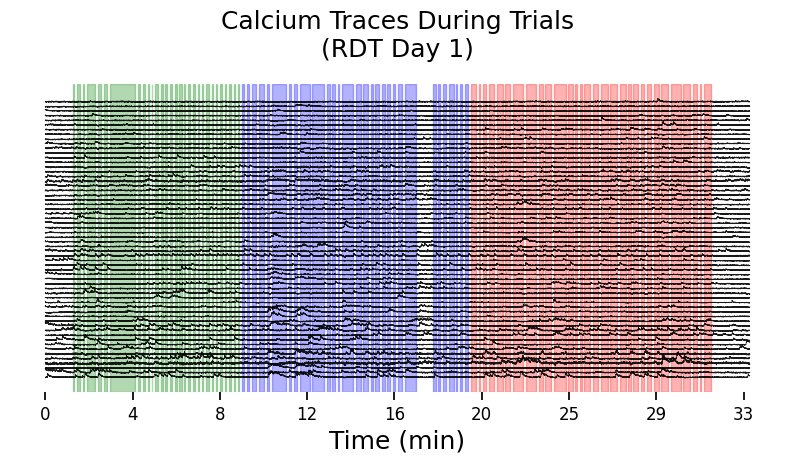

In [46]:
df_events = load_events(DATA_DIR, MOUSE, SESSION)
df_events = df_events.loc[lambda x: ~x.was_omission]

starts, stops = df_events[["start_time", "reward_collection_time"]].values.T

blocks = df_events["block_type"].values


fig, ax = plt.subplots(1, 1, figsize=(10, 4))

offset = 4


for i, neuron in enumerate(dfp.columns):
    ax.plot(dfp.index, dfp[neuron] + (offset * i), alpha=0.9, color="black", lw=0.5)


COLORS = {1: "green", 2: "blue", 3: "red"}
for block, start, stop in zip(blocks, starts, stops):
    ax.axvspan(start, stop, color=COLORS[block], alpha=0.3)


ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)

ax.set_xlabel("Time (min)")
ax.yaxis.set_visible(False)
ax.set_title("Calcium Traces During Trials\n(RDT Day 1)", pad=20)

sns.despine(fig=fig, left=True, bottom=True)

/tmp/ipykernel_5900/357047717.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)


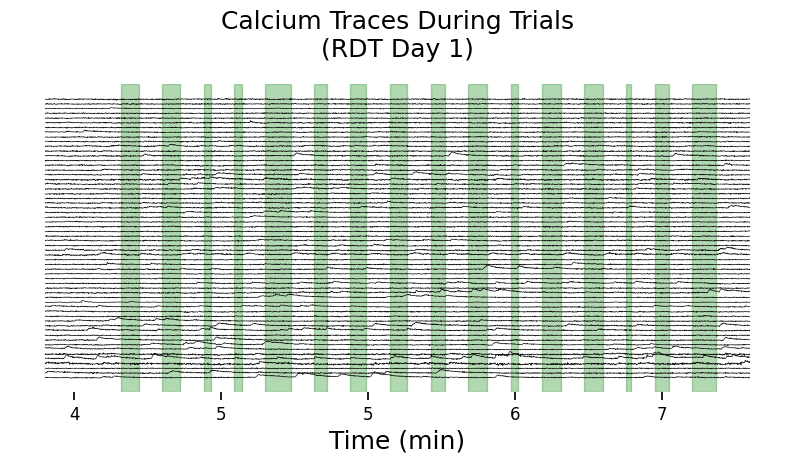

In [47]:
df_events = load_events(DATA_DIR, MOUSE, SESSION)
df_events = df_events.loc[lambda x: ~x.was_omission]

starts, stops = df_events[["start_time", "reward_collection_time"]].values.T

blocks = df_events["block_type"].values


fig, ax = plt.subplots(1, 1, figsize=(10, 4))

offset = 4

dfp2 = dfp.loc[lambda x: (x.index > 4 * 60) & (x.index < 8 * 60)]

for i, neuron in enumerate(dfp2.columns):
    ax.plot(dfp2.index, dfp2[neuron] + (offset * i), alpha=0.9, color="black", lw=0.5)


COLORS = {1: "green", 2: "blue", 3: "red"}
for block, start, stop in zip(blocks, starts, stops):
    if start < 4 * 60:
        continue
    if stop > 8 * 60:
        continue

    ax.axvspan(start, stop, color=COLORS[block], alpha=0.3)


ax.set_xticklabels([int(x / 60) for x in ax.get_xticks().tolist()], fontsize=12)

ax.set_xlabel("Time (min)")
ax.yaxis.set_visible(False)
ax.set_title("Calcium Traces During Trials\n(RDT Day 1)", pad=20)

sns.despine(fig=fig, left=True, bottom=True)

/tmp/ipykernel_5900/3398489684.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


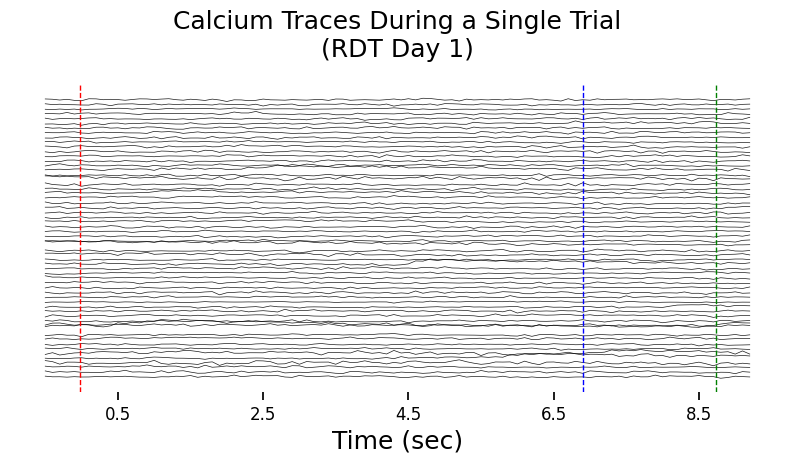

In [71]:
TRIAL = 40

dfp3 = dfp.loc[
    lambda x: (x.index > starts[TRIAL] - 0.5) & (x.index < stops[TRIAL] + 0.5)
]
event_row = df_events.iloc[TRIAL]

mouse_init = event_row["start_time"]
screen_touch_time = event_row["screen_touch_time"]
reward_collection_time = event_row["reward_collection_time"]


fig, ax = plt.subplots(1, 1, figsize=(10, 4))

offset = 1.5

for i, neuron in enumerate(dfp3.columns):
    ax.plot(dfp3.index, dfp3[neuron] + (offset * i), alpha=0.9, color="black", lw=0.5)

ax.axvline(mouse_init, color="red", linestyle="--", lw=1, label="")
ax.axvline(screen_touch_time, color="blue", linestyle="--", lw=1, label="Screen Touch")
ax.axvline(
    reward_collection_time,
    color="green",
    linestyle="--",
    lw=1,
    label="Reward Collection",
)

ax.set_xticklabels(
    [round(x - starts[TRIAL], 1) for x in ax.get_xticks().tolist()], fontsize=12
)

ax.set_xlabel("Time (sec)")
ax.yaxis.set_visible(False)

ax.set_title("Calcium Traces During a Single Trial\n(RDT Day 1)", pad=20)

sns.despine(fig=fig, left=True, bottom=True)